<a href="https://colab.research.google.com/github/daitng17/Deep-learning-with-Keras-Tensorflow/blob/master/linear_classifier_pure_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Constant tensors and variables


In [1]:
import tensorflow as tf

# common ways to create tensors

x = tf.ones(shape=(2,1))
print(x)

x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [2]:
# random tensors

x = tf.random.normal(shape=(3,1), mean=0, stddev=1)
print(x)

x = tf.random.uniform(shape=(3,1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[-0.9904141 ]
 [-0.536814  ]
 [ 0.07951677]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.6466646]
 [0.7704717]
 [0.6956786]], shape=(3, 1), dtype=float32)


In [3]:
# creating a variable

v = tf.Variable(initial_value = tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.2159762 ],
       [ 0.21517584],
       [-0.57453835]], dtype=float32)>


In [4]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [5]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [6]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [7]:
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a,b)
e *= d

print(a, b, c, d, e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [8]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [9]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [10]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position =  4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


In [11]:
import numpy as np

num_sample_per_class = 1000
negative_sammples = np.random.multivariate_normal(
    mean=[0,3], cov=[[1, 0.5],[0.5, 1]], size=num_sample_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3,0], cov=[[1, 0.5],[0.5, 1]], size=num_sample_per_class)

In [12]:
inputs = np.vstack((negative_sammples, positive_samples)).astype(np.float32)

In [13]:
targets = np.vstack((np.zeros((num_sample_per_class,1), dtype="float32"),
                     np.ones((num_sample_per_class,1), dtype="float32")))

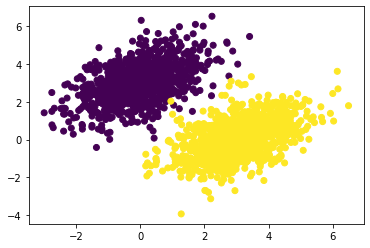

In [14]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [15]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# forward pass function
def model(inputs):
  return tf.matmul(inputs, W) + b

# loss function
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [16]:
# training step

learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [18]:
for step in range(30):
  loss = training_step(inputs, targets)
  print("Loss at step %d: %.4f" % (step, loss))

Loss at step 0: 0.0381
Loss at step 1: 0.0371
Loss at step 2: 0.0361
Loss at step 3: 0.0352
Loss at step 4: 0.0344
Loss at step 5: 0.0337
Loss at step 6: 0.0330
Loss at step 7: 0.0323
Loss at step 8: 0.0318
Loss at step 9: 0.0312
Loss at step 10: 0.0308
Loss at step 11: 0.0303
Loss at step 12: 0.0299
Loss at step 13: 0.0296
Loss at step 14: 0.0292
Loss at step 15: 0.0289
Loss at step 16: 0.0286
Loss at step 17: 0.0284
Loss at step 18: 0.0281
Loss at step 19: 0.0279
Loss at step 20: 0.0277
Loss at step 21: 0.0275
Loss at step 22: 0.0274
Loss at step 23: 0.0272
Loss at step 24: 0.0271
Loss at step 25: 0.0269
Loss at step 26: 0.0268
Loss at step 27: 0.0267
Loss at step 28: 0.0266
Loss at step 29: 0.0265


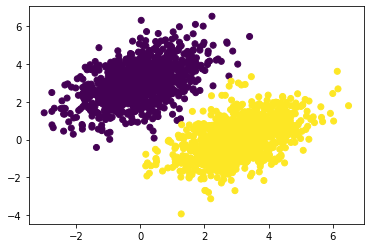

In [19]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1],
            c=predictions[:, 0] > 0.5)
plt.show()

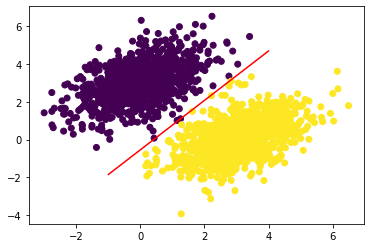

In [23]:
x = np.linspace(-1, 4, 100)
y = - W[0]/W[1]*x + (0.5 - b)/W[1]
plt.plot(x,y,"-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)